In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Saudi Projects
[Dataset Link in Kaggle](https://www.kaggle.com/ghadahaltwalah/saudi-projects-dataset)

[Dataset Source](https://saudiprojects.net/)

In [5]:
# Load the dataset
df = pd.read_csv("Saudi_projects_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sectors              2182 non-null   object 
 1   sector_budgets       2182 non-null   int64  
 2   sector_num_projects  2182 non-null   int64  
 3   name_project         2182 non-null   object 
 4   type_project         2182 non-null   object 
 5   budget_project       849 non-null    float64
 6   startday_project     1186 non-null   object 
 7   enddate_project      921 non-null    object 
 8   area_project         1695 non-null   object 
 9   region_project       2181 non-null   object 
 10  status_project       2182 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 187.6+ KB


In [7]:
df.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project
0,تجاري,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,تجاري,3.350000e+08,03-07-2019,31-12-2021,"7,752 متر مربع","المنطقة الشرقية, الدمام",تحت الإنشاء
1,تجاري,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"تجاري, سكني",NaN,01-01-2010,NaN,"8,000 متر مربع","منطقة الرياض, الرياض",تحت الإنشاء
2,تجاري,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"تجاري, سكني",1.178000e+09,01-01-2009,31-12-2014,"19,500 متر مربع","منطقة الرياض, الرياض",مكتمل
3,تجاري,1058790791316,902,الاحساء ستريب مول – Ahsa Strip Mall ...,تجاري,NaN,NaN,NaN,"19,888 متر مربع","المنطقة الشرقية, الأحساء",معلن عنه
4,تجاري,1058790791316,902,برج الدايل – Al-Dailh Tower,"فندقي, تجاري",1.200000e+08,01-06-2019,31-03-2022,"3,651 متر مربع","منطقة مكة المكرمة, جدة",تحت الإنشاء


---

## Translate the data set Columns

##### The sector Column

In [8]:
df['sectors'] = df['sectors'].str.replace('صحي','Health')
df['sectors'] = df['sectors'].str.replace('تجاري','Commercial')
df['sectors'] = df['sectors'].str.replace('رياضي','Sports')
df['sectors'] = df['sectors'].str.replace('ديني/خيري','Charity')
df['sectors'] = df['sectors'].str.replace('حكومي','Governmental')
df['sectors'] = df['sectors'].str.replace('تعليمي','Educational')
df['sectors'] = df['sectors'].str.replace('ترفيهي/سياحي','Tourist')
df['sectors'] = df['sectors'].str.replace('صناعي','Industrial')
df['sectors'] = df['sectors'].str.replace('سكني','Residential')
df['sectors'] = df['sectors'].str.replace('علمي','Scientific')
df['sectors'] = df['sectors'].str.replace('فندقي','Hotel')
df['sectors'] = df['sectors'].str.replace('البنية التحتية','Infrastructure')

---

##### The type_project Column

In [9]:
# Modify  the type_project
df['type_project'] = df['type_project'].str.replace('صحي','Health')
df['type_project'] = df['type_project'].str.replace('تجاري','Commercial')
df['type_project'] = df['type_project'].str.replace('رياضي','Sports')
df['type_project'] = df['type_project'].str.replace('ديني/خيري','Charity')
df['type_project'] = df['type_project'].str.replace('حكومي','Governmental')
df['type_project'] = df['type_project'].str.replace('تعليمي','Educational')
df['type_project'] = df['type_project'].str.replace('ترفيهي/سياحي','Tourist')
df['type_project'] = df['type_project'].str.replace('صناعي','Industrial')
df['type_project'] = df['type_project'].str.replace('سكني','Residential')
df['type_project'] = df['type_project'].str.replace('علمي','Scientific')
df['type_project'] = df['type_project'].str.replace('فندقي','Hotel')
df['type_project'] = df['type_project'].str.replace('البنية التحتية','Infrastructure')


---

##### The area_project Column
- split the column to two columns : area and unit
- make sure all the values in the area column is numeric
- make sure all the units in the unit column is unified

In [10]:
# Split the column
df[['project_area', 'unit']] = df['area_project'].str.split(' ', 1, expand=True)

In [11]:
df.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit
0,Commercial,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,Commercial,3.350000e+08,03-07-2019,31-12-2021,"7,752 متر مربع","المنطقة الشرقية, الدمام",تحت الإنشاء,"7,752",متر مربع
1,Commercial,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"Commercial, Residential",NaN,01-01-2010,NaN,"8,000 متر مربع","منطقة الرياض, الرياض",تحت الإنشاء,"8,000",متر مربع
2,Commercial,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"Commercial, Residential",1.178000e+09,01-01-2009,31-12-2014,"19,500 متر مربع","منطقة الرياض, الرياض",مكتمل,"19,500",متر مربع
3,Commercial,1058790791316,902,الاحساء ستريب مول – Ahsa Strip Mall ...,Commercial,NaN,NaN,NaN,"19,888 متر مربع","المنطقة الشرقية, الأحساء",معلن عنه,"19,888",متر مربع
4,Commercial,1058790791316,902,برج الدايل – Al-Dailh Tower,"Hotel, Commercial",1.200000e+08,01-06-2019,31-03-2022,"3,651 متر مربع","منطقة مكة المكرمة, جدة",تحت الإنشاء,"3,651",متر مربع


In [ ]:
# Check the units
df['unit'].unique()

In [ ]:
df['unit'].value_counts()

In [12]:
# unify the units
df['unit'] = df['unit'].replace(dict.fromkeys(['متر مربع', 'مترمربع', 'م2', 'متر', 'م٢', 'متر مريع', 'متر مربع', 'مترمربع'], 'square meter'))
df['unit'] = df['unit'].replace(dict.fromkeys([' متر مربع', 'متر مربع', 'متر مربع (المساحة المكتبية)', 'مترمبع', ' مترمربع', 'm2'], 'square meter'))

In [13]:
df['unit'] = df['unit'].replace(dict.fromkeys(['كلم', 'مليون متر مربع', 'كم مربع', 'مليون م2', 'كيلو متر', 'كم.', 'كم2', 'كيلومتر مربع', 'كليو متر'], 'square kilometers'))
df['unit'] = df['unit'].replace(dict.fromkeys(['كم', 'كم ²', 'كيلو', 'ملايين م2', 'ملايين متر مربع', 'مليون مترمربع', 'كلم2', 'كيلومتر'], 'square kilometers'))

In [ ]:
df['unit'].unique()

In [ ]:
df['unit'].value_counts()

In [ ]:
# Check the area column
df['project_area'].unique()

In [14]:
# check the non numeric value
# since some of it has the unit too we will change the unit column according to it
df[df['project_area'] == '1000000ي'] 

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit


In [15]:
df.loc[df['project_area'] == '1000000ي', 'unit'] = "square meter"

In [16]:
#change the units
df.loc[df['project_area'] == '21,908مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '15.000مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '21.000مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '٤١٠٠٠متر', 'unit'] = "square meter"
df.loc[df['project_area'] == '2.420.000متر', 'unit'] = "square meter"
df.loc[df['project_area'] == '37.917مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '10.800مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '13,605مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '74.932مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '65.000م²', 'unit'] = "square meter"
df.loc[df['project_area'] == '15000م2', 'unit'] = "square meter"
df.loc[df['project_area'] == '17000.000م2', 'unit'] = "square meter"
df.loc[df['project_area'] == '3.040.132.32م', 'unit'] = "square meter"
df.loc[df['project_area'] == '495,708مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '١٣٨٠٠٠م٢', 'unit'] = "square meter"
df.loc[df['project_area'] == '١٢٢,٨٢٩مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '151000م٢', 'unit'] = "square meter"
df.loc[df['project_area'] == '28160م2', 'unit'] = "square meter"
df.loc[df['project_area'] == '1.600.270م2', 'unit'] = "square meter"
df.loc[df['project_area'] == '١٧٦', 'unit'] = "square meter"
df.loc[df['project_area'] == '500000م2', 'unit'] = "square meter"
df.loc[df['project_area'] == '110,000م2', 'unit'] = "square meter"
df.loc[df['project_area'] == '15,700مترمربع', 'unit'] = "square meter"
df.loc[df['project_area'] == '21,908مترمربع', 'unit'] = "square meter"

In [17]:
# replase with the correct numeric value
df['project_area'] = df['project_area'].str.replace('٨٠٠٠٠٠٠','8000000')
df['project_area'] = df['project_area'].str.replace('21.908مترمربع','21,908')
df['project_area'] = df['project_area'].str.replace('15.000مترمربع','15,000')
df['project_area'] = df['project_area'].str.replace('21.000مترمربع','21,000')
df['project_area'] = df['project_area'].str.replace('٤١٠٠٠متر','41000')
df['project_area'] = df['project_area'].str.replace('٣٩،٠٠٠','39000')
df['project_area'] = df['project_area'].str.replace('٢٥٠٠٠٠','250000')
df['project_area'] = df['project_area'].str.replace('مليون','1000000')
df['project_area'] = df['project_area'].str.replace('٣٥٠٠٠','35000')
df['project_area'] = df['project_area'].str.replace('2.420.000متر','2,420,000')
df['project_area'] = df['project_area'].str.replace('37.917مترمربع','37,917')
df['project_area'] = df['project_area'].str.replace('10.800مترمربع','10800')
df['project_area'] = df['project_area'].str.replace('13,605مترمربع','13,605')
df['project_area'] = df['project_area'].str.replace('٢٥٠٠٠٠','250000')
df['project_area'] = df['project_area'].str.replace('٨٠.٠٠٠','80000')
df['project_area'] = df['project_area'].str.replace('74.932مترمربع','74932')
df['project_area'] = df['project_area'].str.replace('٣٤٠٠٠٠٠','3400000')
df['project_area'] = df['project_area'].str.replace('65.000م²','65000')
df['project_area'] = df['project_area'].str.replace('٤٠٠٠','4000')
df['project_area'] = df['project_area'].str.replace('15000م2','15000')
df['project_area'] = df['project_area'].str.replace('17000.000م2','17000.000')
df['project_area'] = df['project_area'].str.replace('3.040.132.32م','3,040,132.3')
df['project_area'] = df['project_area'].str.replace('495,708مترمربع','495,708')
df['project_area'] = df['project_area'].str.replace('١٣٨٠٠٠م٢','138000')
df['project_area'] = df['project_area'].str.replace('٨٨,٨٢٥','88825')
df['project_area'] = df['project_area'].str.replace('٧٩٤٦١','79461')
df['project_area'] = df['project_area'].str.replace('٧٨,٤٦٢','78462')
df['project_area'] = df['project_area'].str.replace('٧٩,٩٧٥','79975')
df['project_area'] = df['project_area'].str.replace('١٢٢,٨٢٩مترمربع','122829')
df['project_area'] = df['project_area'].str.replace('151000م٢','151000')
df['project_area'] = df['project_area'].str.replace('28160م2','281602')
df['project_area'] = df['project_area'].str.replace('1.600.270م2','1600270')
df['project_area'] = df['project_area'].str.replace('٥٢٥٠٠٠','525000')
df['project_area'] = df['project_area'].str.replace('١٧٦','176000000')
df['project_area'] = df['project_area'].str.replace('500000م2','500000')
df['project_area'] = df['project_area'].str.replace('110,000م2','110000')
df['project_area'] = df['project_area'].str.replace('15,700مترمربع','15700')
df['project_area'] = df['project_area'].str.replace('21,908مترمربع','21908')
df['project_area'] = df['project_area'].str.replace('1000000ي','2200000')

<ipython-input-17-e8d31c3e172c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['project_area'] = df['project_area'].str.replace('21.908مترمربع','21,908')
<ipython-input-17-e8d31c3e172c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['project_area'] = df['project_area'].str.replace('15.000مترمربع','15,000')
<ipython-input-17-e8d31c3e172c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['project_area'] = df['project_area'].str.replace('21.000مترمربع','21,000')
<ipython-input-17-e8d31c3e172c>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['project_area'] = df['project_area'].str.replace('2.420.000متر','2,420,000')
<ipython-input-17-e8d31c3e172c>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['project_area'] = df['proj

In [18]:
# replace the (.) and (,) and (،) 
# the (.) in this case meant to be (,) not the decimal dot
df['project_area'] = df['project_area'].str.replace('.','')

<ipython-input-18-d14182273a68>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['project_area'] = df['project_area'].str.replace('.','')


In [19]:
df['project_area'] = df['project_area'].str.replace(',','')

In [20]:
df['project_area'] = df['project_area'].str.replace('،','')

In [21]:
# drop the non numeric values
df = df[df['project_area'] != "مساحات"]
df = df[df['project_area'] != "مختلفة"]

In [ ]:
df['project_area'].unique()

In [22]:
# convert to numeric
df["project_area"] = pd.to_numeric(df["project_area"])

In [ ]:
# fix the rest of the units
df['unit'].unique()

In [ ]:
df['unit'].value_counts()

In [23]:
df[df['unit'] == '25,000 متر مربع'] 

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit
807,Educational,567443636867,146,تلال جدة – Tilal Jeddah,"Educational, Residential",4.200000e+10,NaN,NaN,"000 25,000 متر مربع","منطقة مكة المكرمة, جدة",متعثر,0.0,"25,000 متر مربع"
1572,Residential,709916354518,394,تلال جدة – Tilal Jeddah,"Educational, Residential",4.200000e+10,NaN,NaN,"000 25,000 متر مربع","منطقة مكة المكرمة, جدة",متعثر,0.0,"25,000 متر مربع"


In [24]:
df.loc[df['unit'] == '25,000 متر مربع', 'unit'] = "square meter"
df.loc[df['unit'] == '25,000 متر مربع', 'project_area'] = 25000

df.loc[df['unit'] == 'ومائتي ألف متر مربع', 'unit'] = "square meter"

In [25]:
df[df['unit'] == 'lمترمربع'] 

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit
1302,Governmental,1436611825301,461,مستشفى الملك عبدالله التخصصي للأطفال جدة – Kin...,"Governmental, Health",NaN,01-09-2014,30-08-2017,1.075.982 lمترمربع,"منطقة مكة المكرمة, جدة",متأخر,1075982.0,lمترمربع
2160,Health,549859453510,150,مستشفى الملك عبدالله التخصصي للأطفال جدة – Kin...,"Governmental, Health",NaN,01-09-2014,30-08-2017,1.075.982 lمترمربع,"منطقة مكة المكرمة, جدة",متأخر,1075982.0,lمترمربع


In [26]:
df.loc[df['unit'] == 'lمترمربع', 'unit'] = "square meter"

In [27]:
df['unit'] = df['unit'].replace(dict.fromkeys(['ألف م2', 'الف متر مربع', 'ألف متر مربع', 'الف م2', 'الاف متر مربع'], 'thousand square meter'))

In [28]:
df[df['unit'] == 'هكتار'] 

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit
680,Tourist,672120928423,286,جزيرة النورس,"Infrastructure, Commercial, Tourist",NaN,05-08-2013,NaN,23 هكتار,"ينبع, منطقة المدينة المنورة",مكتمل,23.0,هكتار


In [29]:
df['unit'] = df['unit'].replace('هكتار', 'Hectare')

In [30]:
#drop the row with unclear unit
df = df[df['unit'] != "م2 - 360 م2"]

In [31]:
df['unit'].value_counts()

square meter             1329
square kilometers          80
thousand square meter      17
acres                       3
Hectare                     1
Name: unit, dtype: int64

In [32]:
df[df['unit'] == 'Hectare'] 

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit
680,Tourist,672120928423,286,جزيرة النورس,"Infrastructure, Commercial, Tourist",NaN,05-08-2013,NaN,23 هكتار,"ينبع, منطقة المدينة المنورة",مكتمل,23.0,Hectare


In [33]:
df.iloc[679, :]

sectors                                            Tourist
sector_budgets                                672120928423
sector_num_projects                                    286
name_project                جزيرة النورس                  
type_project           Infrastructure, Commercial, Tourist
budget_project                                         NaN
startday_project                                05-08-2013
enddate_project                                        NaN
area_project                                      23 هكتار
region_project                 ينبع, منطقة المدينة المنورة
status_project                                       مكتمل
project_area                                          23.0
unit                                               Hectare
Name: 680, dtype: object

In [34]:
df.iloc[81, :]

sectors                                                  Commercial
sector_budgets                                        1058790791316
sector_num_projects                                             902
name_project           سمارت سكوير – SMART SQUARE                  
type_project                                      Hotel, Commercial
budget_project                                                  NaN
startday_project                                                NaN
enddate_project                                                 NaN
area_project                                             140 ألف م2
region_project                                 منطقة الرياض, الرياض
status_project                                             معلن عنه
project_area                                                  140.0
unit                                          thousand square meter
Name: 81, dtype: object

In [35]:
df.iloc[85, :]

sectors                                                       Commercial
sector_budgets                                             1058790791316
sector_num_projects                                                  902
name_project                          القدية – Qiddiya                  
type_project           Hotel, Infrastructure, Commercial, Tourist, Sp...
budget_project                                                       NaN
startday_project                                              29-04-2018
enddate_project                                                      NaN
area_project                                                     334 كلم
region_project                                                    القدية
status_project                                               تحت الإنشاء
project_area                                                       334.0
unit                                                   square kilometers
Name: 85, dtype: object

In [36]:
#convert all units to squear meter
d = {'square meter': {'square meter': 1, 'square kilometers': 1000000, 'thousand square meter': 1000 ,'acres':4046.85642 , 'Hectare':10000}}

for area, unit in [('project_area', 'square meter')]:
    df[area] = df[area] * df['unit'].map(d[unit])
    df['unit'] = unit

---

##### The region_project Column

In [37]:
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الدمام','ALDAMMAM')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, الرياض','RIYADH')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الأحساء','ALHASSA')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, جدة','JEDDAH')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, الطائف','ALTAIF')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, مدينة الملك عبدالله الاقتصادية','KING ABDULLAH CITY')
df['region_project'] = df['region_project'].str.replace('منطقة عسير, أبها','ABHA')
df['region_project'] = df['region_project'].str.replace('نجران, منطقة نجران','NAJRAN')
df['region_project'] = df['region_project'].str.replace('مكة المكرمة, منطقة مكة المكرمة','MECCA')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الخبر','ALKHOBAR')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, بريدة','BRAIDAH')
df['region_project'] = df['region_project'].str.replace('منطقة عسير, بيشة','BISHA')
df['region_project'] = df['region_project'].str.replace('منطقة الباحة, بلجرشي','BALJURASHI')
df['region_project'] = df['region_project'].str.replace('منطقة جازان, جازان','JAZAN')
df['region_project'] = df['region_project'].str.replace('منطقة تبوك, شرما','SHARMA')
df['region_project'] = df['region_project'].str.replace('منطقة المدينة المنورة, المدينة المنورة','MEDINA')
df['region_project'] = df['region_project'].str.replace('منطقة الباحة, الباحة','ALBAHA')
df['region_project'] = df['region_project'].str.replace('القدية','QIDDIYA')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الجبيل','AL-JUBAIL')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, بريدة','BURAYDAH')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, عنيزة','UNAYZAH')
df['region_project'] = df['region_project'].str.replace('منطقة الحدود الشمالية, عرعر','ARAR')
df['region_project'] = df['region_project'].str.replace('وعد الشمال, منطقة الحدود الشمالية','WAAD ALSHAMAL')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, الدرعية','AD DIRIYAH')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الجبيل الصناعية','ALJUBAIL INDUSTRIAL')
df['region_project'] = df['region_project'].str.replace('منطقة حائل, حائل','HAIL')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, المزاحمية','ALMUZAHMIYA')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, الرس','ARRASS')
df['region_project'] = df['region_project'].str.replace('ينبع, الأحساء, الجبيل الصناعية, الخرج, الطائف, عنيزة','YANBAA, ALHASSA, ALJUBAIL INDUSTRIAL, ALKHARJ, ALTAIF, UNAYZAH')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, مدينة سدير للصناعة والأعمال','SDAIR')
df['region_project'] = df['region_project'].str.replace('منطقة تبوك','TABUK')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الظهران','ALDHAHRAN')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, الخرج','ALKHARJ')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, القويعية','Al QUWAIIYAH')
df['region_project'] = df['region_project'].str.replace('منطقة تبوك, ضبا','DUBA')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, الأفلاج','LAYLA')
df['region_project'] = df['region_project'].str.replace('منطقة تبوك, أملج','UMLUJ')
df['region_project'] = df['region_project'].str.replace('الأحساء','ALHASSA')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, شقراء','SHAQRA')
df['region_project'] = df['region_project'].str.replace('منطقة الجوف, طبرجل','TUBARJAL')
df['region_project'] = df['region_project'].str.replace('منطقة الجوف, دومة الجندل','Dumah Al Jandal')
df['region_project'] = df['region_project'].str.replace('منطقة تبوك','TABUK')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, حفر الباطن','HAFAR ALBATIN')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, ثول','THUWAL')
df['region_project'] = df['region_project'].str.replace('منطقة المدينة المنورة, العلا','ALULA')
df['region_project'] = df['region_project'].str.replace('منطقة الجوف, القريات','ALQURAYYAT')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, بحرة','BAHRAH')
df['region_project'] = df['region_project'].str.replace('منطقة الجوف, سكاكا','SAKAKA')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الخفجي','ALKHAFJI')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, رابغ','RABIGH')
df['region_project'] = df['region_project'].str.replace('مكة المكرمة, منطقة مكة المكرمة, منطقة الرياض, المزاحمية, البرابر, الجموم, الرياض, جدة','MECCA, RIYADH, ALMUZAHMIYA, ALBARABIR, ALJMOOM, JEDDAH')
df['region_project'] = df['region_project'].str.replace('منطقة حائل, الغزالة','ALGHAZALA')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, القنفذة','Al QUNFUDHAH')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, منطقة جازان, مدينة جازان للصناعات الاساسية والتحويلية, الفيصلية, الليث, الشعيبة, ...','MECCA, JAZAN, JAZAN CITY, FAISALIYA, ALLAIT, SHUABAH')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, منطقة الرياض, المنطقة الشرقية, الجبيل','ALQASEEM, RIYADH, EASTERN PROVINCE, ALJUBAIL')
df['region_project'] = df['region_project'].str.replace('مكة المكرمة, منطقة مكة المكرمة, منطقة القصيم','MECCA, ALQASEEM')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, الجموم','ALJUMUM')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, منطقة الرياض, منطقة عسير, محايل عسير, المنطقة الشرقية, الدمام, الرياض, جدة','MECCA, RIYADH, ASEER, EASTERN PROVINCE, ALDAMAM, JEDDAH')
df['region_project'] = df['region_project'].str.replace('منطقة الرياض, المنطقة الشرقية, الدمام, الرياض','ALDAMAM, RIYADH')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, الكامل','ALKAMIL')
df['region_project'] = df['region_project'].str.replace('منطقة المدينة المنورة, منطقة حائل, المدينة المنورة, حائل','MEDINA, HAIL')
df['region_project'] = df['region_project'].str.replace('منطقة الباحة','ALBAHA')
df['region_project'] = df['region_project'].str.replace('منطقة المدينة المنورة, بدر','BADR')
df['region_project'] = df['region_project'].str.replace('مكة المكرمة, مدينة الملك عبدالله الاقتصادية, المدينة المنورة, جدة','MECCA, KING ABDULLAH CITY, MEDINA, JEDDAH')
df['region_project'] = df['region_project'].str.replace('وعد الشمال, منطقة القصيم, منطقة الجوف, منطقة الحدود الشمالية, منطقة الرياض, منطقة حائل, مدينة سدير ل...','NORTH PROVINCE, JAWF, RIYADH, HAIL, SDAIR')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, الجبيل, الجبيل الصناعية','EASTERN PROVINCE, JUBAIL, JUBAIL INDUSTRIAL')
df['region_project'] = df['region_project'].str.replace('منطقة عسير, محايل عسير','MUHAYIL ASEER')
df['region_project'] = df['region_project'].str.replace('منطقة جازان, مدينة جازان للصناعات الاساسية والتحويلية','JAZAN')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, رياض الخبراء','ALQASEEM')
df['region_project'] = df['region_project'].str.replace('منطقة المدينة المنورة, الحناكية','ALHENAKIYA')
df['region_project'] = df['region_project'].str.replace('ينبع, منطقة المدينة المنورة','YANBAA')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, رأس الخير','RAS ALKHAIR')
df['region_project'] = df['region_project'].str.replace('منطقة الحدود الشمالية, طريف','TURAIF')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية, جزيرة تاروت','TAROUT ISLAND')
df['region_project'] = df['region_project'].str.replace('منطقة الباحة','ALBAHA')
df['region_project'] = df['region_project'].str.replace('ضبا','DHUBA')
df['region_project'] = df['region_project'].str.replace('وادي الدواسر, منطقة الرياض','RIYADH')
df['region_project'] = df['region_project'].str.replace('الرياض','RIYADH')
df['region_project'] = df['region_project'].str.replace('AL-JUBAIL الصناعية','ALJUBAIL')
df['region_project'] = df['region_project'].str.replace('مكة المكرمة, الطائف','MECCA, TAIF')
df['region_project'] = df['region_project'].str.replace('منطقة عسير, خميس مشيط','ASEER, KAHMIS MUSHAIT')
df['region_project'] = df['region_project'].str.replace('منطقة RIYADH, المجمعة','ALMUJMAA')
df['region_project'] = df['region_project'].str.replace('فيفاء, منطقة جازان','FEIFAA')
df['region_project'] = df['region_project'].str.replace('MECCA, ALMUZAHMIYA, البرابر, الجموم, RIYADH, جدة','MECCA, ALMUZAHMIYA, ALJMUM, ALBARABIR, RIYADH, JEDDAH')
df['region_project'] = df['region_project'].str.replace('منطقة جازان','ALJAZAN')
df['region_project'] = df['region_project'].str.replace(' تبوك RIYADH', 'TABUK')
df['region_project'] = df['region_project'].str.replace('TABUK, تبوك','TABUK')
df['region_project'] = df['region_project'].str.replace('منطقة RIYADH','RIYADH')
df['region_project'] = df['region_project'].str.replace('MECCA, JAZAN, JAZAN CITY, FAISALIYA, ALLAIT, SHUABAHان, جدة','JEDDAH, SHUABAH, ALLAIT, FAISALIYA, JAZAN, MECCA')
df['region_project'] = df['region_project'].str.replace('منطقة نجران','NAJRAN')
df['region_project'] = df['region_project'].str.replace('MECCA, منطقة القصيم','ALQASEEM, MECCA')
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, RIYADH, AL-JUBAIL','ALJUBAIL, RIYADH, ALQASEEM')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, RIYADH, MUHAYIL ASEER, ALDAMMAM, RIYADH, جدة','JEDDAH, RIYADH, ALDAMAM, MUHAYIL ASEER, MECCA')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, تربة','TURBAH')
df['region_project'] = df['region_project'].str.replace('RIYADH, عفيف','AFEEF')
df['region_project'] = df['region_project'].str.replace('الجبيل, الجبيل الصناعية','ALJUBAIL')
df['region_project'] = df['region_project'].str.replace('حائل','HAIL')
df['region_project'] = df['region_project'].str.replace('المنطقة الشرقية','EASTERN PROVINCE')
df['region_project'] = df['region_project'].str.replace('NORTH PROVINCE, JAWF, RIYADH, HAIL, SDAIRاعة والأعمال, المجمعة, RIYADH, بريدة, HAIL, عرعر','ARAR, RIYADH, BURAYDAH, HAIL, ALMUJMAA, SDAIR, JAWF, EASTERN PROVINCE')
df['region_project'] = df['region_project'].str.replace('AL-JUBAIL, الجبيل الصناعية','ALJUBAIL')
df['region_project'] = df['region_project'].str.replace('القطيف, EASTERN PROVINCE','ALQATEEF, EASTERN PROVINCE')
df['region_project'] = df['region_project'].str.replace('جدة','JEDDAH')
df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, الليث','ALLAIT')
df['region_project'] = df['region_project'].str.replace('مكة المكرمة, JEDDAH','JEDDAH, MECCA')
df['region_project'] = df['region_project'].str.replace('منطقة المدينة المنورة','MADENAH')
df['region_project'] = df['region_project'].str.replace('منطقة عسير','ASEER')
df['region_project'] = df['region_project'].str.replace('ALJAZAN, الشقيق','ALJAZAN, ALSHAQEEQ')
df['region_project'] = df['region_project'].str.replace('منطقة HAIL','HAIL')
df['region_project'] = df['region_project'].str.replace('منطقة عسير','ASEER')

<ipython-input-37-c2060ebcb30d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  df['region_project'] = df['region_project'].str.replace('منطقة مكة المكرمة, منطقة جازان, مدينة جازان للصناعات الاساسية والتحويلية, الفيصلية, الليث, الشعيبة, ...','MECCA, JAZAN, JAZAN CITY, FAISALIYA, ALLAIT, SHUABAH')
<ipython-input-37-c2060ebcb30d>:65: FutureWarning: The default value of regex will change from True to False in a future version.
  df['region_project'] = df['region_project'].str.replace('وعد الشمال, منطقة القصيم, منطقة الجوف, منطقة الحدود الشمالية, منطقة الرياض, منطقة حائل, مدينة سدير ل...','NORTH PROVINCE, JAWF, RIYADH, HAIL, SDAIR')


---

##### The status_project Column

In [38]:
df["status_project"].value_counts()

تحت الإنشاء          711
مكتمل                447
معلن عنه             433
متأخر                347
المشاريع المقترحة    162
متعثر                 63
ملغي                  16
Name: status_project, dtype: int64

In [39]:
df['status_project'] = df['status_project'].str.replace('تحت الإنشاء','Under the construction')
df['status_project'] = df['status_project'].str.replace('مكتمل','Complete')
df['status_project'] = df['status_project'].str.replace('معلن عنه','Announced')
df['status_project'] = df['status_project'].str.replace('متأخر','Late')
df['status_project'] = df['status_project'].str.replace('المشاريع المقترحة','Suggested projects')
df['status_project'] = df['status_project'].str.replace('متعثر','Stumbled')
df['status_project'] = df['status_project'].str.replace('ملغي','Canceled')

In [40]:
df.status_project.unique()

array(['Under the construction', 'Complete', 'Announced',
       'Suggested projects', 'Late', 'Stumbled', 'Canceled'], dtype=object)

---

In [44]:
df.to_csv(r"saudi_projects_updated.csv")

## EDA

In [60]:
df.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project,project_area,unit
0,Commercial,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,Commercial,3.350000e+08,03-07-2019,31-12-2021,"7,752 متر مربع",ALDAMMAM,Under the construction,7752.0,square meter
1,Commercial,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"Commercial, Residential",NaN,01-01-2010,NaN,"8,000 متر مربع",RIYADH,Under the construction,8000.0,square meter
2,Commercial,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"Commercial, Residential",1.178000e+09,01-01-2009,31-12-2014,"19,500 متر مربع",RIYADH,Complete,19500.0,square meter
3,Commercial,1058790791316,902,الاحساء ستريب مول – Ahsa Strip Mall ...,Commercial,NaN,NaN,NaN,"19,888 متر مربع",ALHASSA,Announced,19888.0,square meter
4,Commercial,1058790791316,902,برج الدايل – Al-Dailh Tower,"Hotel, Commercial",1.200000e+08,01-06-2019,31-03-2022,"3,651 متر مربع",JEDDAH,Under the construction,3651.0,square meter


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2181
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sectors              2179 non-null   object 
 1   sector_budgets       2179 non-null   int64  
 2   sector_num_projects  2179 non-null   int64  
 3   name_project         2179 non-null   object 
 4   type_project         2179 non-null   object 
 5   budget_project       847 non-null    float64
 6   startday_project     1185 non-null   object 
 7   enddate_project      921 non-null    object 
 8   area_project         1692 non-null   object 
 9   region_project       2178 non-null   object 
 10  status_project       2179 non-null   object 
 11  project_area         1430 non-null   float64
 12  unit                 2179 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 238.3+ KB


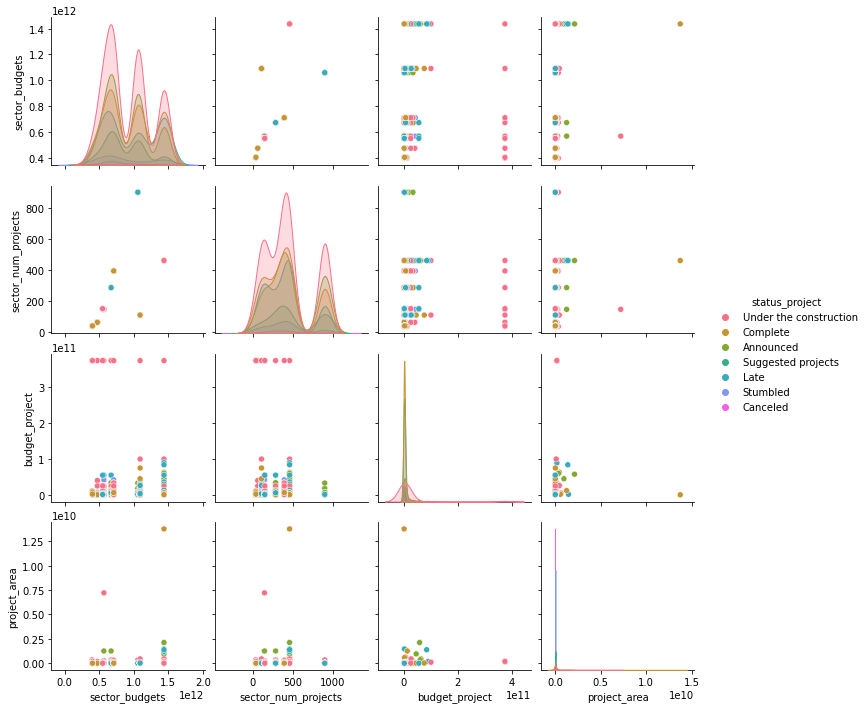

In [52]:
# grid of plots for each variable in the dataset

g = sns.pairplot(df, hue="status_project", palette="husl")

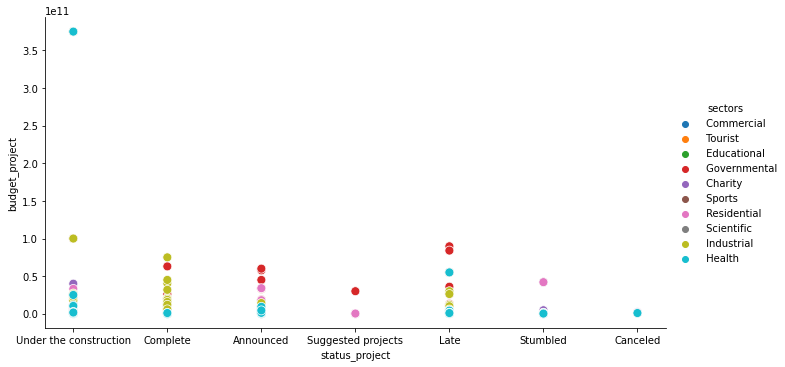

In [74]:
# scatter plot to show relationship between project budget and status in which sector 

sns.relplot(x="status_project", y="budget_project", hue="sectors", s=80, data=df, height=5, aspect=15/8)

C:\Users\assoma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sector_budgets', ylabel='Density'>

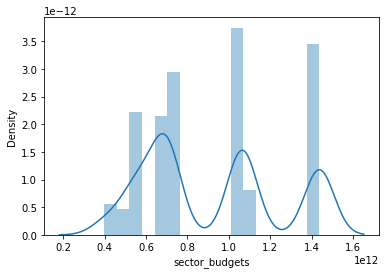

In [53]:
# histogram distribution of sector budgets 

sns.distplot(df["sector_budgets"])

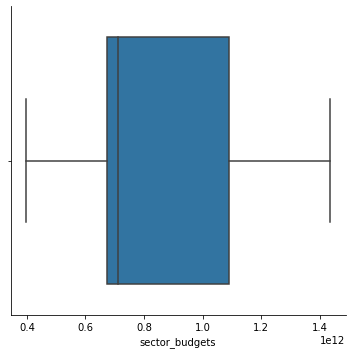

In [55]:
# box plot 

sns.catplot(x="sector_budgets", kind="box", data=df)

In [56]:
# heat map

corelation = df.corr()

<AxesSubplot:>

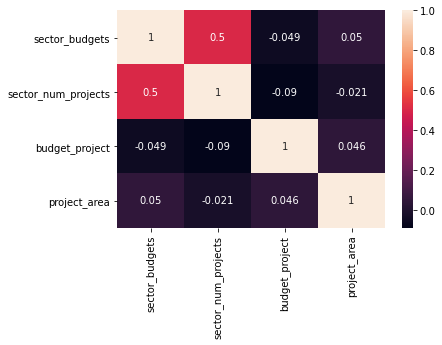

In [57]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)